# Skin Detection
## Bianchi Luca (4805748)

In [402]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv


In [403]:
def normalized(rgb):

        norm=np.zeros_like(rgb,np.float32)

        r = rgb[:, :, 0]
        g = rgb[:, :, 1]
        b = rgb[:, :, 2]
        sum=rgb.sum(axis=2)

        norm[:,:,0]=r/sum*255.0
        norm[:,:,1]=g/sum*255.0
        norm[:,:,2]=b/sum*255.0

        norm_rgb=cv.convertScaleAbs(norm)
        return norm_rgb

In [404]:
outputs = []
FILE_DIR = './material/images'

In [405]:
"""
with os.scandir(FILE_DIR+"/skin/") as direct:
    for file in direct:
        plt.figure(figsize=(12, 4))
        plt.title(file.name)
        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
        skin_img_array = normalized(np.asarray(skin_img))
        plt.subplot(1, 4, 1)
        plt.imshow(skin_img_array)
        plt.subplot(1, 4, 2)
        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 1], norm=True)
        plt.subplot(1, 4, 3)
        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 2], norm=True)
        plt.subplot(1, 4, 4)
        plt.scatter(skin_img_array[:, :, 1], skin_img_array[:, :, 2], norm=True)
"""

'\nwith os.scandir(FILE_DIR+"/skin/") as direct:\n    for file in direct:\n        plt.figure(figsize=(12, 4))\n        plt.title(file.name)\n        skin_img = io.imread(FILE_DIR + "/skin/" + file.name)\n        skin_img_array = normalized(np.asarray(skin_img))\n        plt.subplot(1, 4, 1)\n        plt.imshow(skin_img_array)\n        plt.subplot(1, 4, 2)\n        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 1], norm=True)\n        plt.subplot(1, 4, 3)\n        plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 2], norm=True)\n        plt.subplot(1, 4, 4)\n        plt.scatter(skin_img_array[:, :, 1], skin_img_array[:, :, 2], norm=True)\n'

/tmp/ipykernel_20662/2058946283.py:10: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,0]=r/sum*255.0
/tmp/ipykernel_20662/2058946283.py:11: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,1]=g/sum*255.0
/tmp/ipykernel_20662/2058946283.py:12: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,2]=b/sum*255.0
/tmp/ipykernel_20662/2279171896.py:9: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.185, 100)
/tmp/ipykernel_20662/2279171896.py:9: RuntimeWarning: invalid value encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.185, 100)


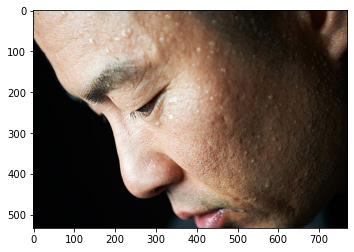

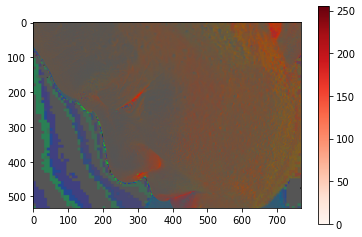

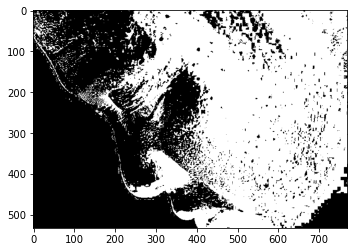

In [406]:
img = io.imread(FILE_DIR + "/manSweatingCloseup.jpg")
plt.figure()
plt.imshow(img)
img_array = np.asarray(img)
img_array_norm = normalized(img_array)
plt.figure()
plt.imshow(img_array_norm, cmap="Reds")
plt.colorbar(orientation="vertical")
mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.185, 100)
plt.figure()
plt.imshow(mask_rg, cmap='gray')

Proviamo a prendere come sample Channel 1 (G) / Channel 0 (R), da cui
riusciamo a ottenere una distinzione abbastanza pulita e uniforme degli elementi
di pelle, quindi correggiamone gli artefati e visualizziamola


Ma siccome i risultati sono troppo sporchi, lasciamoli qui, per ora

In [407]:
#plt.imshow(target, cmap="gray")

### HSB

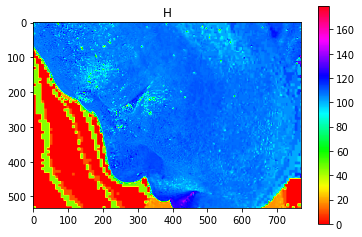

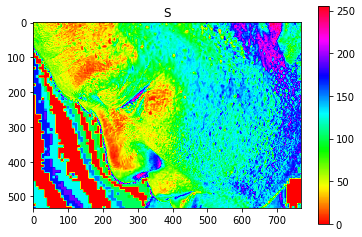

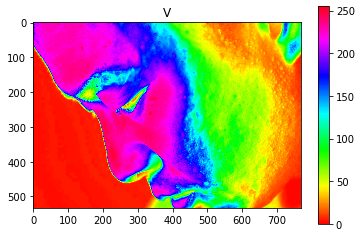

In [408]:
img_hsb = cv.cvtColor(img_array, cv.COLOR_BGR2HSV)
label = ["H", "S", "V"]

for elem in range(img_hsb.shape[2]):
    plt.figure()
    plt.imshow(img_hsb[:, :, elem], cmap="hsv")
    plt.colorbar(orientation='vertical')
    plt.title(label[elem])

Proviamo ad applicare una gaussiana per eseguire lo smoothing dei colori nelle
aree più rumorose e studiamo il risultato

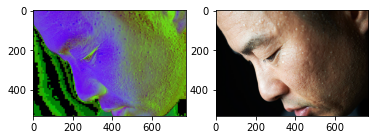

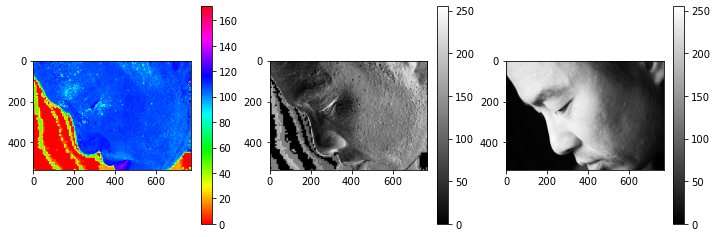

In [409]:
img_hsb[:,:,0] = cv.GaussianBlur(img_hsb[:,:,0], (3, 3), 0)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_hsb)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_hsb[:, : , 0], cmap='hsv')
plt.colorbar(orientation='vertical')
plt.subplot(1, 3, 2)
plt.imshow(img_hsb[:, :, 1], cmap='gray')
plt.colorbar(orientation='vertical')
plt.subplot(1, 3, 3)
plt.imshow(img_hsb[:, :, 2], cmap='gray')
plt.colorbar(orientation='vertical')

Filtriamo quindi per tenere i valori della mappa di colore tra 80 (verde) e
140 (blu)

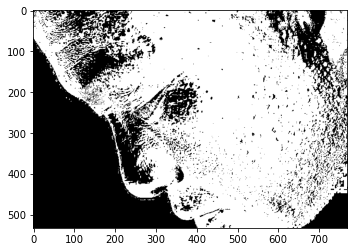

In [410]:
mask_hsv = cv.inRange(img_hsb[:,:,0], 60, 140) & cv.inRange(img_hsb[:, :, 1], 40, 170)
plt.imshow(mask_hsv, cmap="gray")

Sebbene ci sia un abbozzo di risultato, questo è...
Non ottimale, per così dire.

Proviamo quindi ad integrare questo metodo con altro

## YCrCb

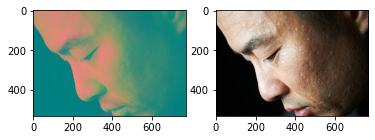

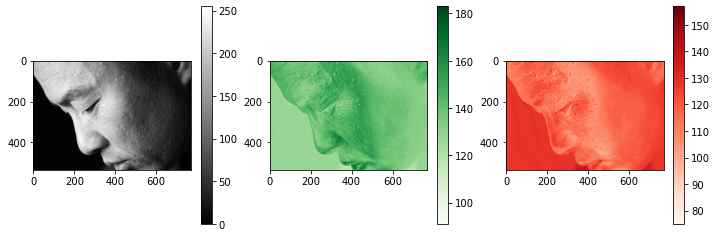

In [411]:
img_ycbcr = cv.cvtColor(img_array, cv.COLOR_RGB2YCrCb)
label = ["Original", "Y", "Cb", "Cr"]
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_ycbcr)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_ycbcr[:, : , 0], cmap='gray')
plt.colorbar(orientation='vertical')
plt.subplot(1, 3, 2)
plt.imshow(img_ycbcr[:, :, 1], cmap='Greens')
plt.colorbar(orientation='vertical')
plt.subplot(1, 3, 3)
plt.imshow(img_ycbcr[:, :, 2], cmap='Reds')
plt.colorbar(orientation='vertical')

Proviamo a filtrare sui canali Cr e Cb, dai quali possiamo estrarre ulteriore
informazione

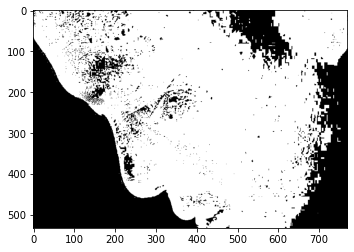

In [412]:
mask_ycrcb = cv.inRange(img_ycbcr[:, :, 1], 133, 173) & cv.inRange(img_ycbcr[:, :, 2], 77, 127)
plt.imshow(mask_ycrcb, cmap="gray")

Proviamo ora a combinare i due filtri

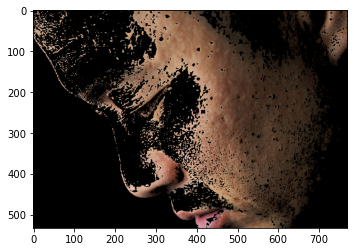

In [413]:
mask_combined = mask_hsv & mask_ycrcb & mask_rg
plt.imshow(cv.bitwise_and(img, img, mask=mask_combined) , cmap='gray')